In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ifft2(a, axes):
    a = np.fft.ifftshift(a, axes=axes)
    a = np.fft.ifft2(a, axes=axes, norm='ortho')
    a = np.fft.fftshift(a, axes=axes)
    return a.astype(np.complex64)

def rss(a, axis, keepdims=False):
    a = a.real ** 2 + a.imag ** 2
    a = np.sum(a, axis=axis, keepdims=keepdims)
    a = np.sqrt(a)
    return a

In [3]:
# get kspace data
with h5py.File('./20220801_110450_AntiVCAM1_CTL_ID001_F_18mon_TP0_1_1.h5') as f:
    kspace = f['kspace'][:]
print(kspace.shape, kspace.dtype)

(402, 212, 1, 1, 4, 18, 4) complex64


In [4]:
# convert kspace data into image domain
ispace = ifft2(kspace, axes=(0,1))
print(ispace.shape, ispace.dtype)

(402, 212, 1, 1, 4, 18, 4) complex64


In [5]:
# coil combination
img = rss(ispace, axis=4, keepdims=True)
print(img.shape, img.dtype)

(402, 212, 1, 1, 1, 18, 4) float32


In [6]:
# average over repetitions
mean_img = np.mean(img, axis=6, keepdims=True)
print(mean_img.shape, mean_img.dtype)

(402, 212, 1, 1, 1, 18, 1) float32


In [7]:
# select center slice
mean_img_slice = np.take(mean_img, indices=[9], axis=5)
print(mean_img_slice.shape, mean_img_slice.dtype)

(402, 212, 1, 1, 1, 1, 1) float32


In [8]:
# remove axes of length one
mean_slice = np.squeeze(mean_img_slice)
print(mean_slice.shape, mean_slice.dtype)

(402, 212) float32


(-0.5, 211.5, 401.5, -0.5)

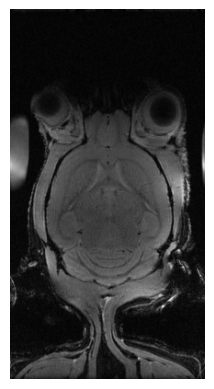

In [9]:
# plot
plt.imshow(mean_slice, cmap='gray')
plt.axis('off')